In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

# 1. Read in Image, Grayscale and Blur

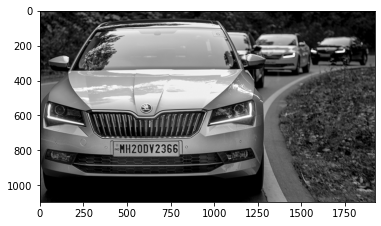

In [6]:
image = cv2.imread("image_3.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGR2RGB))

# 2. Apply filters and find edges for localization

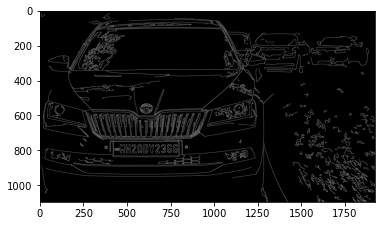

In [9]:
bfilter = cv2.bilateralFilter(gray,11,17,17) #Noise reduction
edged = cv2.Canny(bfilter,30,200)  #Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.cv2.COLOR_BGR2RGB))

# 3. Find countours and applay mask

In [10]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [11]:
location =  None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [13]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0 , 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

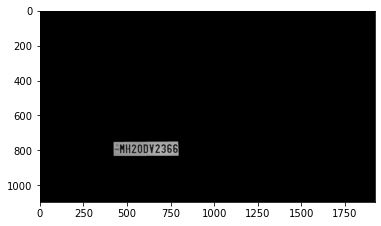

In [14]:
plt.imshow(cv2.cvtColor(new_image,cv2.cv2.COLOR_BGR2RGB))

In [15]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

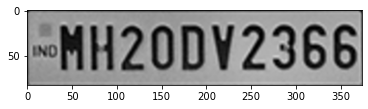

In [16]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.cv2.COLOR_BGR2RGB))

# 4. Use EASY OCR to read text

In [17]:
reader = easyocr.Reader(["en"])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 1], [374, 1], [374, 79], [0, 79]], '~HHZODV2366 ', 0.44101918310346316)]

# 5.Render Result

The plate number is ~HHZODV2366 


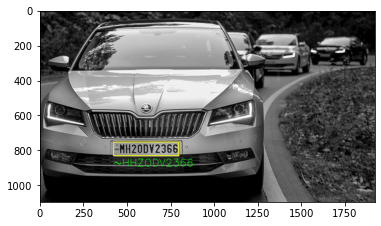

In [23]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=2, 
                  color=(0,255,0),thickness=2,)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,255),3)
print("The plate number is",text)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))